# 分析方向

根据前面的数据清理流程，发现数据有这些特点：

* 收集的数据跨度有2年
* 对于不同的tweet信息，有对应的点赞和转发信息
* tweet内容的质量（狗狗可爱不）也有一定的依据（有一个评分体系）

所以这里会深入的分析tweet内容与转发等之间的关系及得出一些猜想


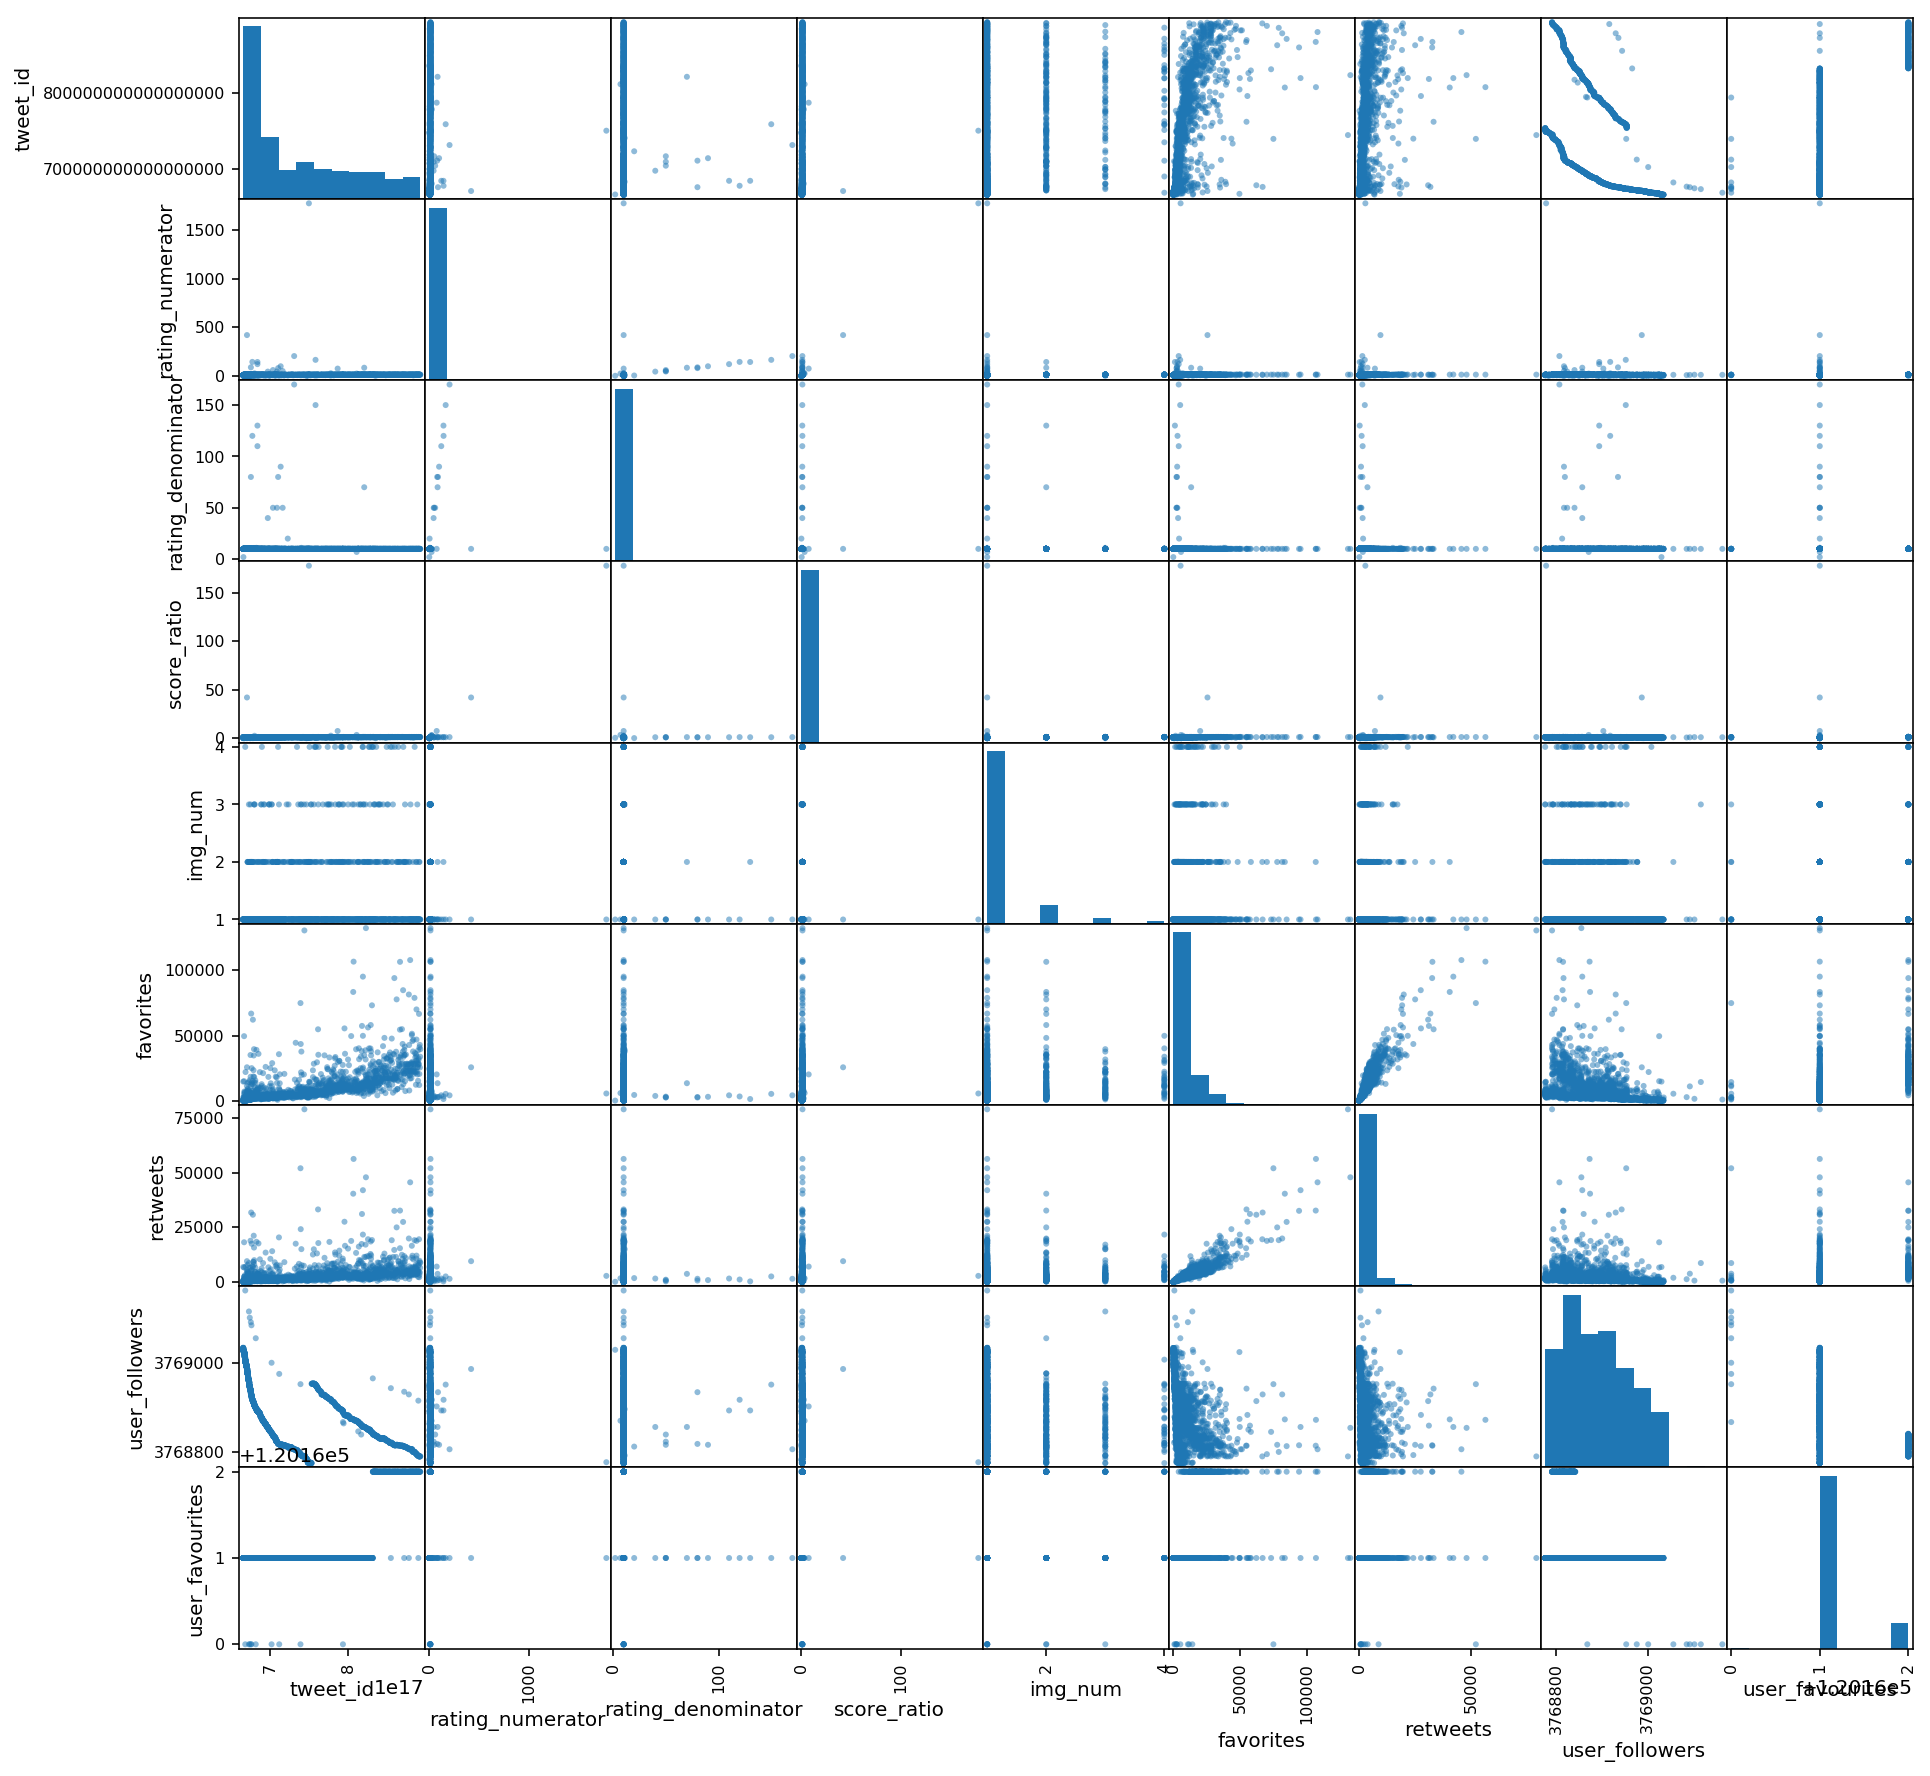

In [11]:
import pandas as pd
% matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


%config InlineBackend.figure_format = "retina"

# 先大致了解下数据的情况
df = pd.read_csv('twitter_archive_master.csv')

pd.plotting.scatter_matrix(df, figsize=(15,15));

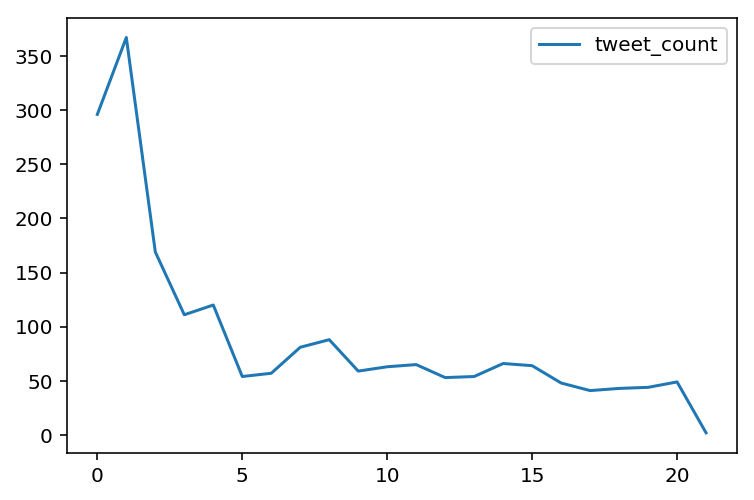

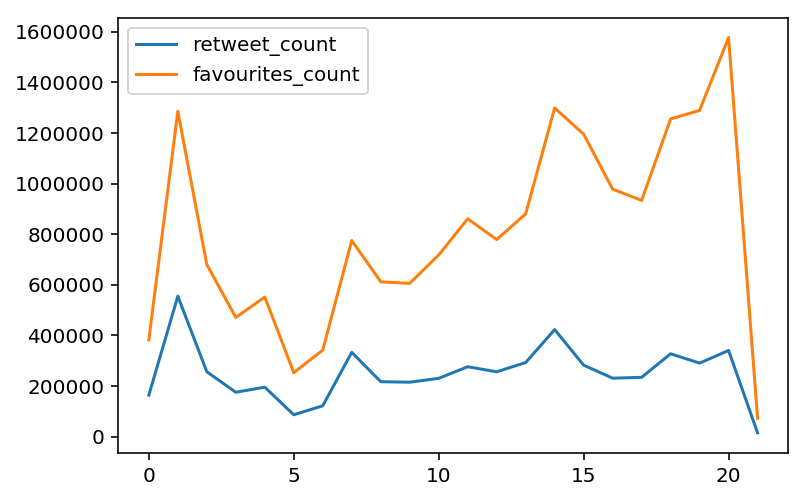

In [12]:
df['timestamp']=pd.to_datetime(df['timestamp'])

df['date_month']=pd.to_datetime(df['timestamp']).values.astype('datetime64[M]')

month_group = df.groupby('date_month')
plot_data_df = pd.DataFrame([], columns=['month','tweet_count', 'retweet_count', 'favourites_count'])

for name,group in month_group:
    nest_dict = pd.DataFrame([name,len(group.tweet_id), sum(group.retweets), sum(group.favorites)]).T
    nest_dict.columns = plot_data_df.columns
    plot_data_df = pd.concat([plot_data_df, nest_dict], ignore_index=True)


# 每个月发送tweet的数量    
plot_data_df[['tweet_count']].plot()

# 每个月转发和点赞的数量  
plot_data_df[['retweet_count','favourites_count']].plot()

###  1. 转发和点赞之间的关系

### 结论

* 点赞数和转发数是正相关的
* 用户更喜欢点赞，转发的行为相对会弱一点

### 2.  tweet在时间维度上的变化

### 结论

* 在前期用户少时需要更多的运营，发送更多的内容，才能维持大家的喜爱
* 用户数达到临界值后，可以只进行日常的维护，来保证账号的持续产出
* “网络效应”通过这个例子得到证明

(-1.1045606122902887,
 1.1055214063740244,
 -1.106080972962496,
 1.1002895701410713)

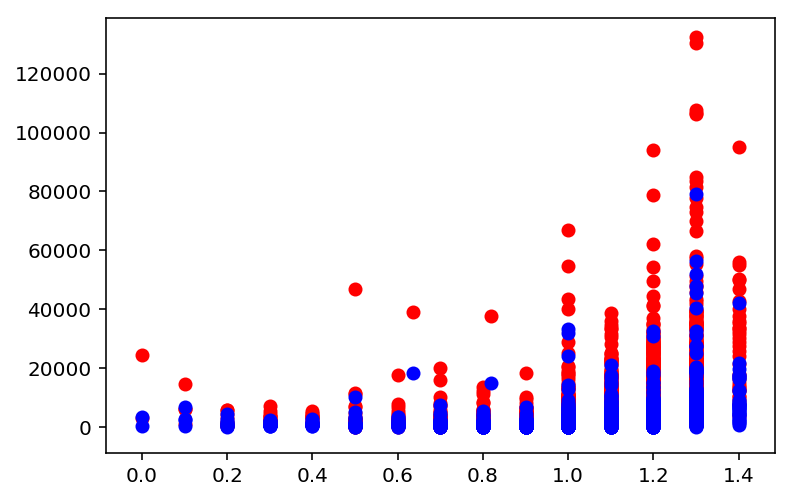

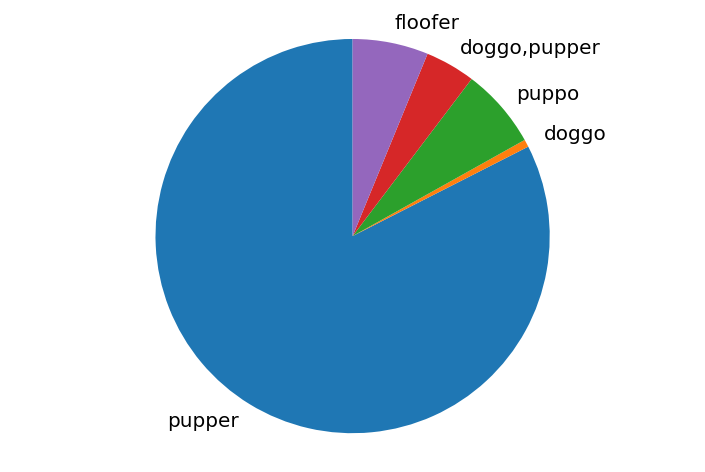

In [15]:
df['score_ratio'].sort_values()

# 将特别高的打分先保存起来，这样剩下的数据图像的趋势明显一些
df_high_score = df[df['score_ratio']>=2.0]


# 打分高低与转发次数的关系
df = df[df['score_ratio']<2.0]
plt.scatter(df['score_ratio'], df['favorites'], color='red')
plt.scatter(df['score_ratio'], df['retweets'], color='blue')


# 展示狗的不同类型，引发的转发次数
# 只展示最重要的前5个分类
dog_stage_count = list(df[df['dog_stage'] != 'None'].groupby(['dog_stage'])['retweets'].sum())[0:5]
dog_stages = df[df['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:5]

fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, labels = dog_stages, startangle = 90)
ax1.axis('equal')

In [4]:
df_high_score

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,score_ratio,jpg_url,img_num,date_time,favorites,retweets,user_followers,user_favourites,dog_stage,date_month
819,670842764863651840,2015-11-29 05:52:33,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420,10,None,42.000000,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,2015-11-29 05:52:33,25673.0,9509.0,3768987.0,120161.0,NaN,2015-11-01
949,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,3.428571,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,2016-12-19 23:06:23,5904.0,1647.0,3768871.0,120161.0,NaN,2016-12-01
1047,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,7.500000,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,2016-10-13 23:23:56,20221.0,7033.0,3768903.0,120161.0,NaN,2016-10-01
1147,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,2.700000,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,2016-09-20 00:24:34,7292.0,1867.0,3768918.0,120161.0,NaN,2016-09-01
1493,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,177.600000,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,2016-07-04 15:00:45,5594.0,2769.0,3768778.0,120161.0,NaN,2016-07-01
1911,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,2.600000,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,2015-12-25 21:06:00,1868.0,542.0,3768906.0,120161.0,pupper,2015-12-01


### 有趣的地方

通过查看对应分数最高的两张"狗狗"的照片，可以看到用户对有创意的图片情有独钟

<img align=left width="150" height="150" src="https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg"/>
<img align=left width="150" height="150" src="https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg"/>


### 3. 转发（点赞）和内容质量的关系

* 当狗狗的评分相对高一点时，对应tweet的转发和点赞数普遍会高很多
* 狗狗评分中，pupper和puppo类型的狗狗会得到更多的转发及点赞

In [9]:
df['user_followers'].sort_values()

# 用关注的最大值减去最小值
print(3769163.0-3768776.0)

387.0


## 4. 猜想

tweets_json.txt由于是使用的是udacity提供的内容，最多是一天之内就准备好了。
但是在获取用户的关注数时，就增加了387个粉丝

当时是2017-08-01，有3769163的粉丝。
现在是2018-12-15，有7510000的粉丝。

平均每天需要增长7959个用户，再次证明了互联网头部资源的“网络效应”